In [1]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
plt.style.use('ggplot')


from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter


import warnings
warnings.filterwarnings(action='ignore')
import ipywidgets

In [2]:
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_validate, KFold

from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc as calculate_auc

In [4]:
df_1 = pd.read_csv('../data/df_1.csv')

In [5]:
df_1

,Tofu,How many liters of water do you drink per day?,Processed Meat (es prosciutto),SEX,Do you play a sport (at least 5 hours/week)?,Do you eat differently at the weekend?,How do you sleep at night?,How many sugary drinks do you consume per day?,Raw vegetables,Cow's milk,...,How many times do you eat a day?,Nuts,Legumes,Fish,Fruits,Eggs,Whole grains food,Do you happen to eat uncontrollably even if you're not hungry?,How many times do you consume alcoholic beverages in a week?,Meat
0,Yes,2,Yes,M,No,"Yes, I eat more at home",1,1,Yes,Yes,...,5,Yes,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
1,Yes,3,Yes,M,Yes,"Yes, I eat at restaurants",0,1,Yes,Yes,...,6,Yes,Yes,Yes,Yes,Yes,Yes,Never,1,Yes
2,Yes,1,Yes,F,No,"Yes, I eat at restaurants",0,3,Yes,No,...,3,Yes,Yes,No,No,No,Yes,Every day,3,Yes
3,Yes,2,Yes,F,No,"Yes, I eat at restaurants",0,1,Yes,Yes,...,4,Yes,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
4,No,1,Yes,M,Yes,No,1,3,No,No,...,5,No,Yes,Yes,Yes,No,Yes,Often (>1/week),1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Yes,4,Yes,M,No,No,0,3,Sometimes,Sometimes,...,2,Yes,No,No,No,Yes,No,Often (>1/week),2,Sometimes
3113,No,3,Sometimes,M,No,"Yes, I eat more at home",0,0,No,No,...,4,No,No,Yes,Yes,Sometimes,Yes,Often (>1/week),2,No
3114,Sometimes,1,Yes,M,No,"Yes, I eat more at home",1,2,Sometimes,Sometimes,...,5,Sometimes,No,Yes,No,No,Yes,Often (>1/week),0,Yes
3115,No,1,Yes,F,Yes,"Yes, I eat at restaurants",0,3,No,Sometimes,...,3,No,No,Sometimes,No,Sometimes,Sometimes,Never,0,Yes


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   Tofu                                                            3117 non-null   object
 1   How many liters of water do you drink per day?                  3117 non-null   int64 
 2   Processed Meat (es prosciutto)                                  3117 non-null   object
 3   SEX                                                             3117 non-null   object
 4   Do you play a sport (at least 5 hours/week)?                    3117 non-null   object
 5   Do you eat differently at the weekend?                          3117 non-null   object
 6   How do you sleep at night?                                      3117 non-null   int64 
 7   How many sugary drinks do you consume per day?              

In [7]:
# удалим features, которые не имеют / практически не имеют статистической значимости
df_1 = df_1.drop('How many times do you eat a day?',axis = 1)
df_1 = df_1.drop('How many liters of water do you drink per day?',axis = 1)
df_1 = df_1.drop('Raw vegetables',axis = 1)
df_1 = df_1.drop('Legumes',axis = 1)
df_1 = df_1.drop('Do you ever eat distracted or not at the table?',axis = 1)
df_1 = df_1.drop('Do you eat fast?',axis = 1)
df_1 = df_1.drop('Vegetable drinks (eg soy milk)',axis = 1)
significant_features = df_1.columns
significant_features

Index(['Tofu', 'Processed Meat (es prosciutto)', 'SEX',
       'Do you play a sport (at least 5 hours/week)?',
       'Do you eat differently at the weekend?', 'How do you sleep at night?',
       'How many sugary drinks do you consume per day?', 'Cow's milk',
       'Fresh cheeses', 'Do you ever miss meals?', 'Cooked vegetables',
       'Low-fat white yogurt', 'Do you wake up to eat at night?',
       'When are you hungry during the day?', 'Nuts', 'Fish', 'Fruits', 'Eggs',
       'Whole grains food',
       'Do you happen to eat uncontrollably even if you're not hungry?',
       'How many times do you consume alcoholic beverages in a week?', 'Meat'],
      dtype='object')

In [8]:
df_filtered = df_1[significant_features]
df_filtered


,Tofu,Processed Meat (es prosciutto),SEX,Do you play a sport (at least 5 hours/week)?,Do you eat differently at the weekend?,How do you sleep at night?,How many sugary drinks do you consume per day?,Cow's milk,Fresh cheeses,Do you ever miss meals?,...,Do you wake up to eat at night?,When are you hungry during the day?,Nuts,Fish,Fruits,Eggs,Whole grains food,Do you happen to eat uncontrollably even if you're not hungry?,How many times do you consume alcoholic beverages in a week?,Meat
0,Yes,Yes,M,No,"Yes, I eat more at home",1,1,Yes,Yes,No,...,Never,In the evening,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
1,Yes,Yes,M,Yes,"Yes, I eat at restaurants",0,1,Yes,Yes,No,...,Never,In the morning,Yes,Yes,Yes,Yes,Yes,Never,1,Yes
2,Yes,Yes,F,No,"Yes, I eat at restaurants",0,3,No,Sometimes,Yes,...,Often (>1/week),In the afternoon,Yes,No,No,No,Yes,Every day,3,Yes
3,Yes,Yes,F,No,"Yes, I eat at restaurants",0,1,Yes,No,No,...,Never,In the evening,Yes,Yes,Yes,Yes,Yes,Infrequent (1/month),1,Yes
4,No,Yes,M,Yes,No,1,3,No,No,No,...,Infrequent (1/month),In the afternoon,No,Yes,Yes,No,Yes,Often (>1/week),1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,Yes,Yes,M,No,No,0,3,Sometimes,No,"Yes, lunch",...,Often (>1/week),In the morning,Yes,No,No,Yes,No,Often (>1/week),2,Sometimes
3113,No,Sometimes,M,No,"Yes, I eat more at home",0,0,No,Sometimes,Yes,...,Never,In the evening,No,Yes,Yes,Sometimes,Yes,Often (>1/week),2,No
3114,Sometimes,Yes,M,No,"Yes, I eat more at home",1,2,Sometimes,Sometimes,"Yes, lunch",...,Infrequent (1/month),In the afternoon,Sometimes,Yes,No,No,Yes,Often (>1/week),0,Yes
3115,No,Yes,F,Yes,"Yes, I eat at restaurants",0,3,Sometimes,Yes,"Yes, dinner",...,Infrequent (1/month),In the evening,No,Sometimes,No,Sometimes,Sometimes,Never,0,Yes


### ONE HOT ENCODING

Убираем колонки c числовыми признаками


In [9]:
df_filtered_new = df_1.drop(['How many sugary drinks do you consume per day?','How do you sleep at night?', 'How many times do you consume alcoholic beverages in a week?'], axis=1)

In [10]:
onehotencoder = OneHotEncoder()
data_new = onehotencoder.fit_transform(df_filtered_new.values)


In [11]:
data_new_dense = onehotencoder.fit_transform(df_filtered_new).toarray()

In [12]:
# get_feature_names_out() для получения имен новых признаков
data_new_df = pd.DataFrame(data_new_dense, columns=onehotencoder.get_feature_names_out())

data_new_df

,Tofu_Don't know,Tofu_No,Tofu_Sometimes,Tofu_Yes,Processed Meat (es prosciutto)_No,Processed Meat (es prosciutto)_Sometimes,Processed Meat (es prosciutto)_Yes,SEX_F,SEX_M,Do you play a sport (at least 5 hours/week)?_No,...,Whole grains food_No,Whole grains food_Sometimes,Whole grains food_Yes,Do you happen to eat uncontrollably even if you're not hungry?_Every day,Do you happen to eat uncontrollably even if you're not hungry?_Infrequent (1/month),Do you happen to eat uncontrollably even if you're not hungry?_Never,Do you happen to eat uncontrollably even if you're not hungry?_Often (>1/week),Meat_No,Meat_Sometimes,Meat_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3114,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3115,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
numerical_features = ['How many sugary drinks do you consume per day?','How do you sleep at night?',
                       'How many times do you consume alcoholic beverages in a week?']
numerical_data = df_1[numerical_features]

# соединяем числовые данные с категориальными данными после OneHotEncoding
final_df = pd.concat([data_new_df, numerical_data.reset_index(drop=True)], axis=1)
final_df

,Tofu_Don't know,Tofu_No,Tofu_Sometimes,Tofu_Yes,Processed Meat (es prosciutto)_No,Processed Meat (es prosciutto)_Sometimes,Processed Meat (es prosciutto)_Yes,SEX_F,SEX_M,Do you play a sport (at least 5 hours/week)?_No,...,Do you happen to eat uncontrollably even if you're not hungry?_Every day,Do you happen to eat uncontrollably even if you're not hungry?_Infrequent (1/month),Do you happen to eat uncontrollably even if you're not hungry?_Never,Do you happen to eat uncontrollably even if you're not hungry?_Often (>1/week),Meat_No,Meat_Sometimes,Meat_Yes,How many sugary drinks do you consume per day?,How do you sleep at night?,How many times do you consume alcoholic beverages in a week?
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0,1
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,0,3
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3,0,2
3113,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,0,2
3114,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1,0
3115,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3,0,0


In [14]:
#  final_df.to_csv('data_new.csv', index=False)

In [15]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc as calculate_auc

In [17]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [18]:
X = final_df.drop('How do you sleep at night?', axis=1)
y = final_df['How do you sleep at night?']

In [19]:
X.columns = [col.replace(' ', '_').replace('?', '').replace('%', '').replace('(', '').replace(')', '').replace(',', '').replace(':', '').replace('{', '').replace('}', '') for col in X.columns]

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)
print(X_test.shape)

(2493, 65)
(624, 65)


In [22]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [23]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)


In [24]:
print(X_train_t.shape)
print(X_test_t.shape)

(2493, 65)
(624, 65)


### CrossValidation

сравнение производительности нескольких классификаторов машинного обучения на основе метрик (precision,  recall, F1-мера и время обучения/предсказания)

**cv_results** - это DataFrame, используемый для хранения результатов оценки каждой модели по метрикам и времени обучения/предсказания

**scoring** определяет используемые метрики для оценки моделей

Для каждой модели из list_of_models кросс-валидация и результаты оценки (средние значения)  в cv_results для каждой модели.

In [25]:
list_of_models = [
    CatBoostClassifier(random_state=42, silent=True),  # CatBoostClassifier поддерживает random_state
    RandomForestClassifier(random_state=42),  # RandomForestClassifier поддерживает random_state
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),  # XGBClassifier поддерживает random_state
    LGBMClassifier(random_state=42),  # LGBMClassifier поддерживает random_state
    GradientBoostingClassifier(random_state=42)  # GradientBoostingClassifier поддерживает random_state
]

list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

#  random_state для контроля случайного разбиения на папки
cv = KFold(n_splits=10, shuffle=True, random_state=42)

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train,
        y=y_train,
        scoring=scoring,
        cv=cv, 
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,6.214543,0.023669,0.595651,0.594199,0.593867,0.593361
RandomForestClassifier,0.650269,0.028987,0.579222,0.577603,0.575880,0.574648
XGBClassifier,1.434782,0.012011,0.583224,0.582078,0.581774,0.581067
LGBMClassifier,4.346994,0.019250,0.579998,0.579251,0.579379,0.578654
GradientBoostingClassifier,0.575096,0.008694,0.581622,0.580914,0.580930,0.580393


In [26]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## RandomForestClassifier()

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.66      0.59       308
           1       0.58      0.47      0.52       316

    accuracy                           0.56       624
   macro avg       0.56      0.56      0.56       624
weighted avg       0.56      0.56      0.56       624

Confusion Matrix:
[[202 106]
 [169 147]]


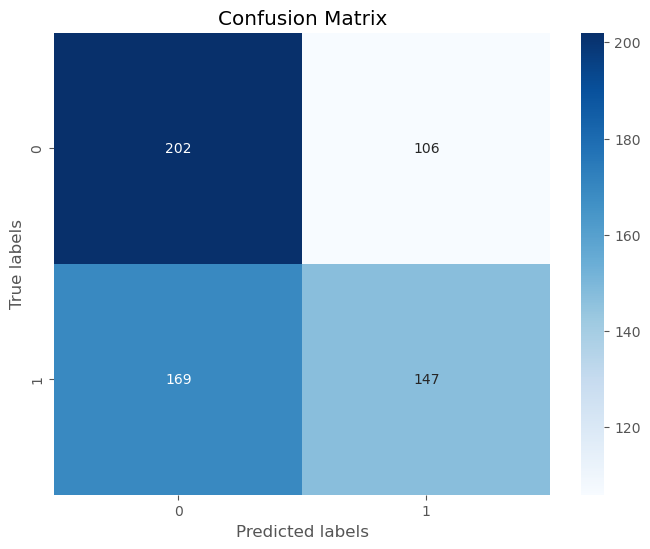

In [27]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
y_ens =model.predict_proba(X_test)

# вероятности для класса 1
y_ens_class_1 = y_ens[:, 1]

In [29]:
auc = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc}")

AUC-ROC_1: 0.6211316373499918


## Подбор гиперпараметров для RandomForestClassifier

In [ ]:
!pip install optuna

In [32]:
import optuna 

In [34]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 200, 3000)
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 8)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # RandomForestClassifier с параметрами
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                   min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                   max_features=max_features, criterion=criterion, bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds, average='macro')
    
    return f1


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500)

print('Количество завершенных испытаний:', len(study.trials))
print('Лучшее испытание:', study.best_trial.params)

[I 2024-03-22 14:03:28,905] A new study created in memory with name: no-name-532baa6c-12c4-4e36-857e-dfec1c701164
[I 2024-03-22 14:03:33,571] Trial 0 finished with value: 0.6002130468008244 and parameters: {'n_estimators': 2039, 'max_depth': 47, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.6002130468008244.
[I 2024-03-22 14:03:36,688] Trial 1 finished with value: 0.5693803559657218 and parameters: {'n_estimators': 764, 'max_depth': 64, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.6002130468008244.
[I 2024-03-22 14:03:37,166] Trial 2 finished with value: 0.5987654320987654 and parameters: {'n_estimators': 214, 'max_depth': 28, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.6002130468008244.


Количество завершенных испытаний: 500
Лучшее испытание: {'n_estimators': 445, 'max_depth': 10, 'min_samples_split': 12, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}


In [35]:
best_params = {
    'n_estimators': 445,
    'max_depth': 10,
    'min_samples_split': 12,
    'min_samples_leaf': 8,
    'max_features': 'sqrt',
    'criterion': 'entropy', 'bootstrap': False
}


rf_1 = RandomForestClassifier(**best_params, random_state=42)

rf_1.fit(X_train, y_train)



RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_leaf=8, min_samples_split=12,
                       n_estimators=445, random_state=42)

#### Random Forest модель 1

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       308
           1       0.63      0.60      0.61       316

    accuracy                           0.62       624
   macro avg       0.62      0.62      0.62       624
weighted avg       0.62      0.62      0.62       624

Confusion Matrix:
[[197 111]
 [127 189]]


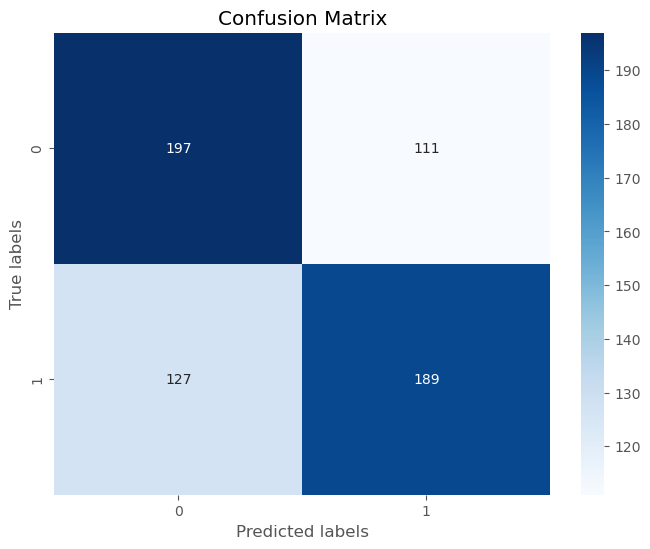

In [36]:
y_pred = rf_1.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
y_ens =rf_1.predict_proba(X_test)

# вероятность для класса 1
y_ens_class_1 = y_ens[:, 1]

In [38]:
auc_1 = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc_1}")

AUC-ROC_1: 0.6491348841032386


***Важность признаков (features importance)*** 

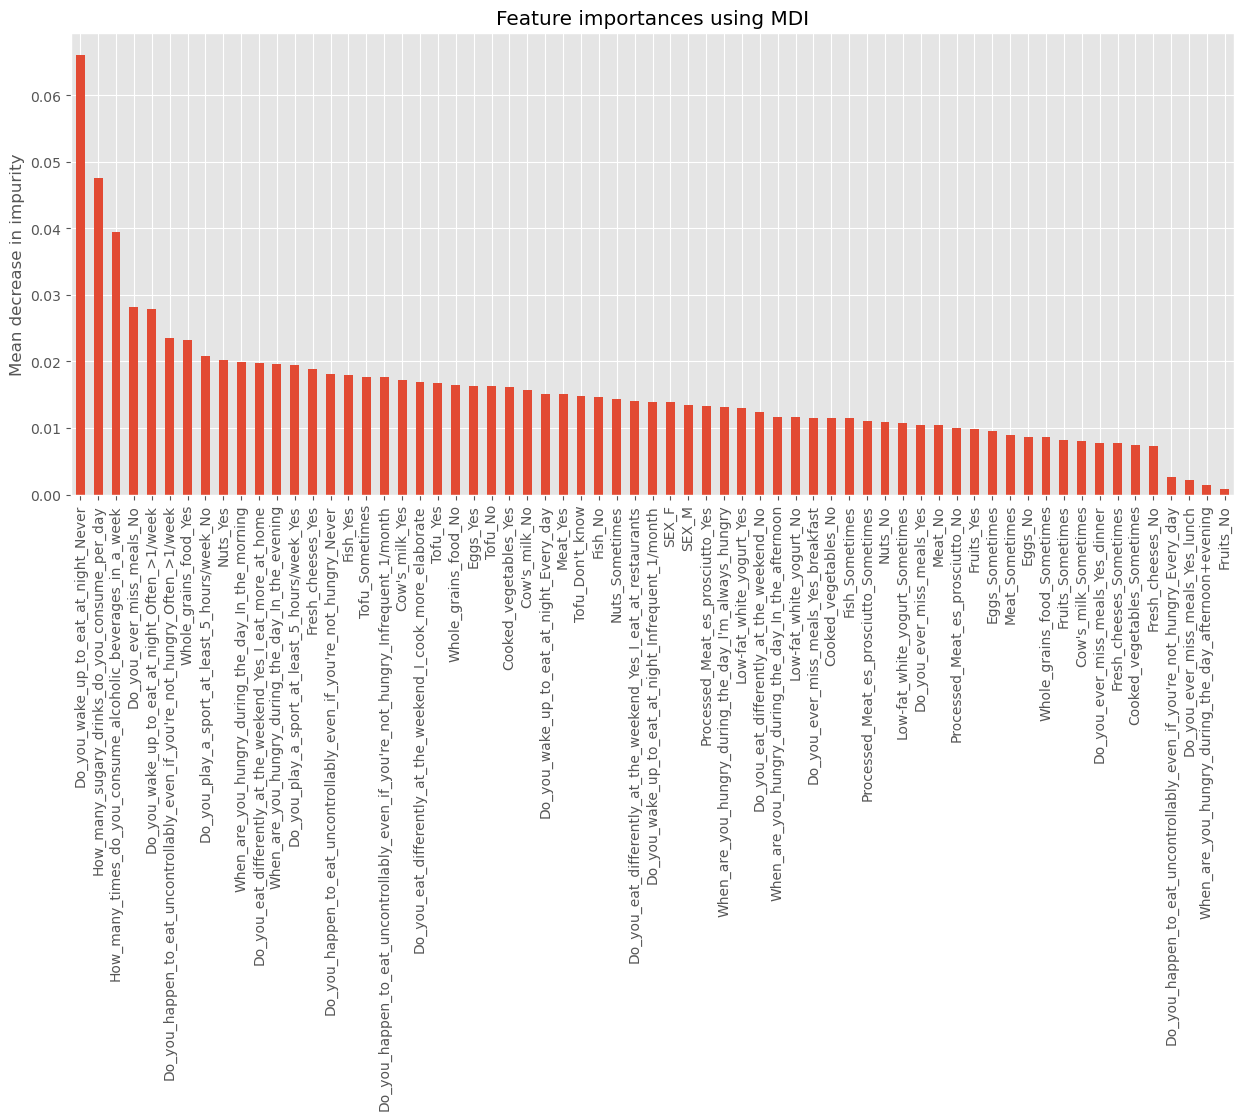

In [40]:
importances = rf_1.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

# признаки по убыванию важности
forest_importances_sorted = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(15,6)) 

forest_importances_sorted.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.show()

In [41]:
# признаки по убыванию важности
forest_importances_sorted.head(15) 

Do_you_wake_up_to_eat_at_night_Never                                           0.066114
How_many_sugary_drinks_do_you_consume_per_day                                  0.047504
How_many_times_do_you_consume_alcoholic_beverages_in_a_week                    0.039472
Do_you_ever_miss_meals_No                                                      0.028149
Do_you_wake_up_to_eat_at_night_Often_>1/week                                   0.027843
Do_you_happen_to_eat_uncontrollably_even_if_you're_not_hungry_Often_>1/week    0.023501
Whole_grains_food_Yes                                                          0.023290
Do_you_play_a_sport_at_least_5_hours/week_No                                   0.020861
Nuts_Yes                                                                       0.020276
When_are_you_hungry_during_the_day_In_the_morning                              0.019844
Do_you_eat_differently_at_the_weekend_Yes_I_eat_more_at_home                   0.019771
When_are_you_hungry_during_the_d